# Coupled Model

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [15]:
# set up plotting settings for dark mode.
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from src.plot_utils import ps_defaults
ps_defaults(use_tex=False, dpi=150)

In [5]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

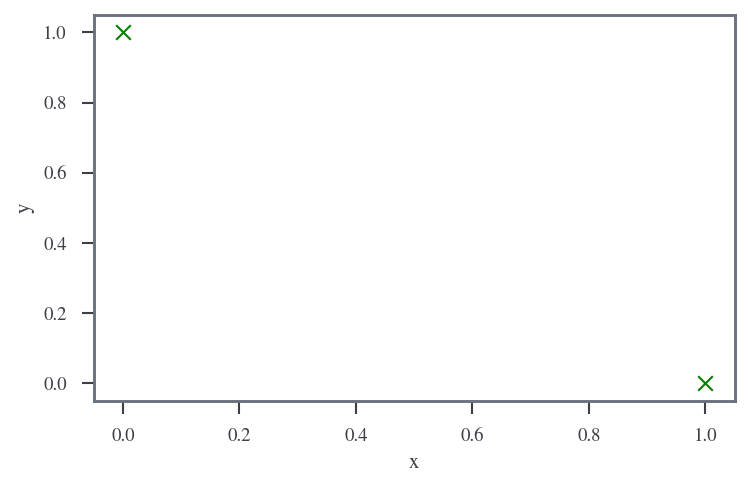

In [20]:
plt.scatter([0, 1], [1, 0], color="green")
plt.xlabel("x")
plt.ylabel("y")

In [21]:
from src.configs.load_config import load_config

In [30]:
cfg = load_config(test=False)

In [28]:
cfg.project = "h"

In [31]:
cfg

{'project': 'seager19', 'user': 'non-test', 'test': True, 'notes': 'test', 'run': True, 'animate': True, 'atmos': True, 'ocean': {'tcom_name': 'tcom', 'tios2cdf_name': 'tios2cdf', 'spin': True, 'diag': True, 'ingrid': True, 'run_through': True, 'animate_qflx': True}, 'oc': {'nummode': 2, 'boundaries': 'Periodic', 'wind_file': 'tau-ECMWF-clim', 'dq_dtemp_file': 'dQdT-sample.nc', 'dq_df_file': 'dQdf-sample.nc', 'sst_file': 'sst-ECMWF-clim.nc', 'mask_file': 'om_mask.nc', 'time_test': '2 months', 'time_spin': '2 months', 'time_diag': '2 years', 'time_run2f': '58 years'}, 'coup': {'c_d': 0.00225, 'rho_air': 1.225}, 'atm': {'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, 'r': 0.8, 'h_q': 1800, 'wnsp_min': 4, 'rho_00': 0.3, 'pr_max': 0.0002314814814814815, 'relative_humidity': 0.8, 'number_iterations': 50, 'height_tropopause': 15000.0, 'theta_00': 300, 'nbsq': 0.0003, 'radius_earth': 6370000.0, 'pi': 3.141592653589793, 'stefan_boltzman_const': 5.67e-08, 'sec_in_day': 86400, 'gravity': 9.8, 'temp

In [34]:
from src.models.model_setup import ModelSetup
from src.constants import TEST_DIREC

In [35]:
cfg = load_config(test=False)
setup = ModelSetup(str(TEST_DIREC))

In [37]:
from src.models.ocean import Ocean

In [38]:
ocean = Ocean(cfg, setup)
ocean.compile_all()
if cfg.run:
   ocean.run_all()
if cfg.animate:
   ocean.animate_all()

editing  /home/users/sithom/seager19/src/test/test_direc/ocean/RUN/om_spin
editing  /home/users/sithom/seager19/src/test/test_direc/ocean/RUN/om_diag
editing  /home/users/sithom/seager19/src/test/test_direc/ocean/RUN/om_run2f
cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
../SRC/tcom -i om_test 2.86110 s

cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
../SRC/tcom -i om_spin -t om_spin.tios 362.27703 s

cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
../SRC/tios2cdf -f output/om_spin 4.43037 s

cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
rm -rf output/om_spin.data output/om_spin.indx 0.17291 s

cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
cp -f output/om_spin.save output/om_spin.20y.restart 0.07122 s

cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
../SRC/tcom -i om_diag -t om_diag.tios 50.83164 s

cd /home/users/sithom/seager19/src/test/test_direc/ocean/RUN 
../SRC/tios2cdf -f output/om_diag 0.

AttributeError: 'DataArray' object has no attribute 'time'

In [ ]:
os.listdir(setup.ocean_data_path)

In [ ]:
os.listdir(setup.ocean_output_path)

In [59]:
from typing import List

def test_funct(x: List[float], y: List[float]):
    for i in range(len(x)):
        if y[i] > 25 or y[i] < -25:
            x[i] = 0.0
        elif 20 < y[i] < 25:
            x[i] = x[i] - (0.2* (y[i]- 20))*x[i]
        elif -20 > y[i] > -25:
            x[i] = x[i] - (0.2* (-y[i] - 20))*x[i]
    return x, y

In [42]:
y_init = [x for x in range(-60, 60)]
x_init = [1 for x in range(-60, 60)]

In [60]:
x_new, y_new = test_funct(x_init, y_init)

In [61]:
x_new

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1,
 0.007999999999999993,
 0.06399999999999996,
 0.216,
 0.512,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0.64,
 0.36,
 0.15999999999999992,
 0.03999999999999998,
 1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [50]:
y_new

[-60,
 -59,
 -58,
 -57,
 -56,
 -55,
 -54,
 -53,
 -52,
 -51,
 -50,
 -49,
 -48,
 -47,
 -46,
 -45,
 -44,
 -43,
 -42,
 -41,
 -40,
 -39,
 -38,
 -37,
 -36,
 -35,
 -34,
 -33,
 -32,
 -31,
 -30,
 -29,
 -28,
 -27,
 -26,
 -25,
 -24,
 -23,
 -22,
 -21,
 -20,
 -19,
 -18,
 -17,
 -16,
 -15,
 -14,
 -13,
 -12,
 -11,
 -10,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59]